In [1]:
import sdds
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
#file_path = '/eos/project/l/lhc-lumimod/MD9407/8957/BPM/Beam1@BunchTurn@2023_06_16@23_39_01_276.sdds'
sampling_rate =11245.5
#file_path = '/eos/project/l/lhc-lumimod/MD9407/8957/BPM/Beam1@BunchTurn@2023_06_17@00_04_02_843.sdds'

file_path = '/eos/project/l/lhc-lumimod/MD9407/8957/BPM/Beam1@Turn@2023_06_17@01_49_09_307.sdds' 

In [3]:
data = sdds.read(file_path)
data.definitions

{'acqStamp': Parameter(name='acqStamp', type='double', symbol=None, units=None, description=None, format=None, fixed_value=None),
 'nbOfCapBunches': Parameter(name='nbOfCapBunches', type='long', symbol=None, units=None, description=None, format=None, fixed_value=None),
 'nbOfCapTurns': Parameter(name='nbOfCapTurns', type='long', symbol=None, units=None, description=None, format=None, fixed_value=None),
 'horPositionsConcentratedAndSorted': Array(name='horPositionsConcentratedAndSorted', type='float', symbol=None, units=None, description=None, format=None, field_length=None, group_name=None, dimensions=None),
 'verPositionsConcentratedAndSorted': Array(name='verPositionsConcentratedAndSorted', type='float', symbol=None, units=None, description=None, format=None, field_length=None, group_name=None, dimensions=None),
 'bpmNames': Array(name='bpmNames', type='string', symbol=None, units=None, description=None, format=None, field_length=None, group_name=None, dimensions=None),
 'horBunchId'

In [28]:
data.values['bpmNames'][0:10]

['BPMYA.4R6.B1',
 'BPM.8R6.B1',
 'BPM.10R6.B1',
 'BPM.12R6.B1',
 'BPM.14R6.B1',
 'BPM.16R6.B1',
 'BPM.18R6.B1',
 'BPM.20R6.B1',
 'BPM.22R6.B1',
 'BPM.24R6.B1']

In [26]:
len(data.values['horPositionsConcentratedAndSorted'])
display(data.values['bpmNames'][0])

'BPMYA.4R6.B1'

[   0    1    2 ... 9997 9998 9999]


<IPython.core.display.Javascript object>


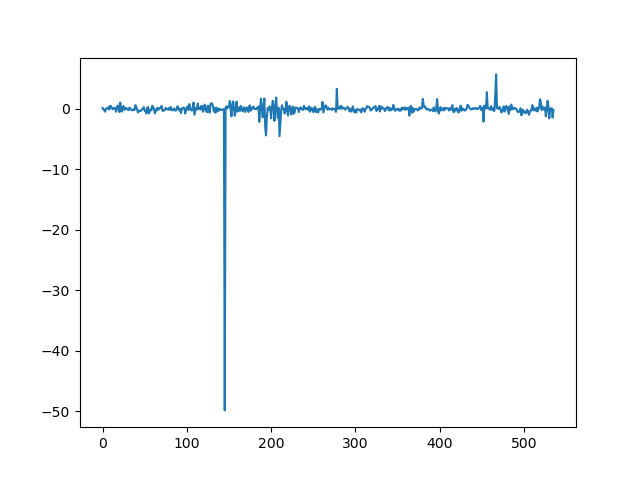

<IPython.core.display.Javascript object>


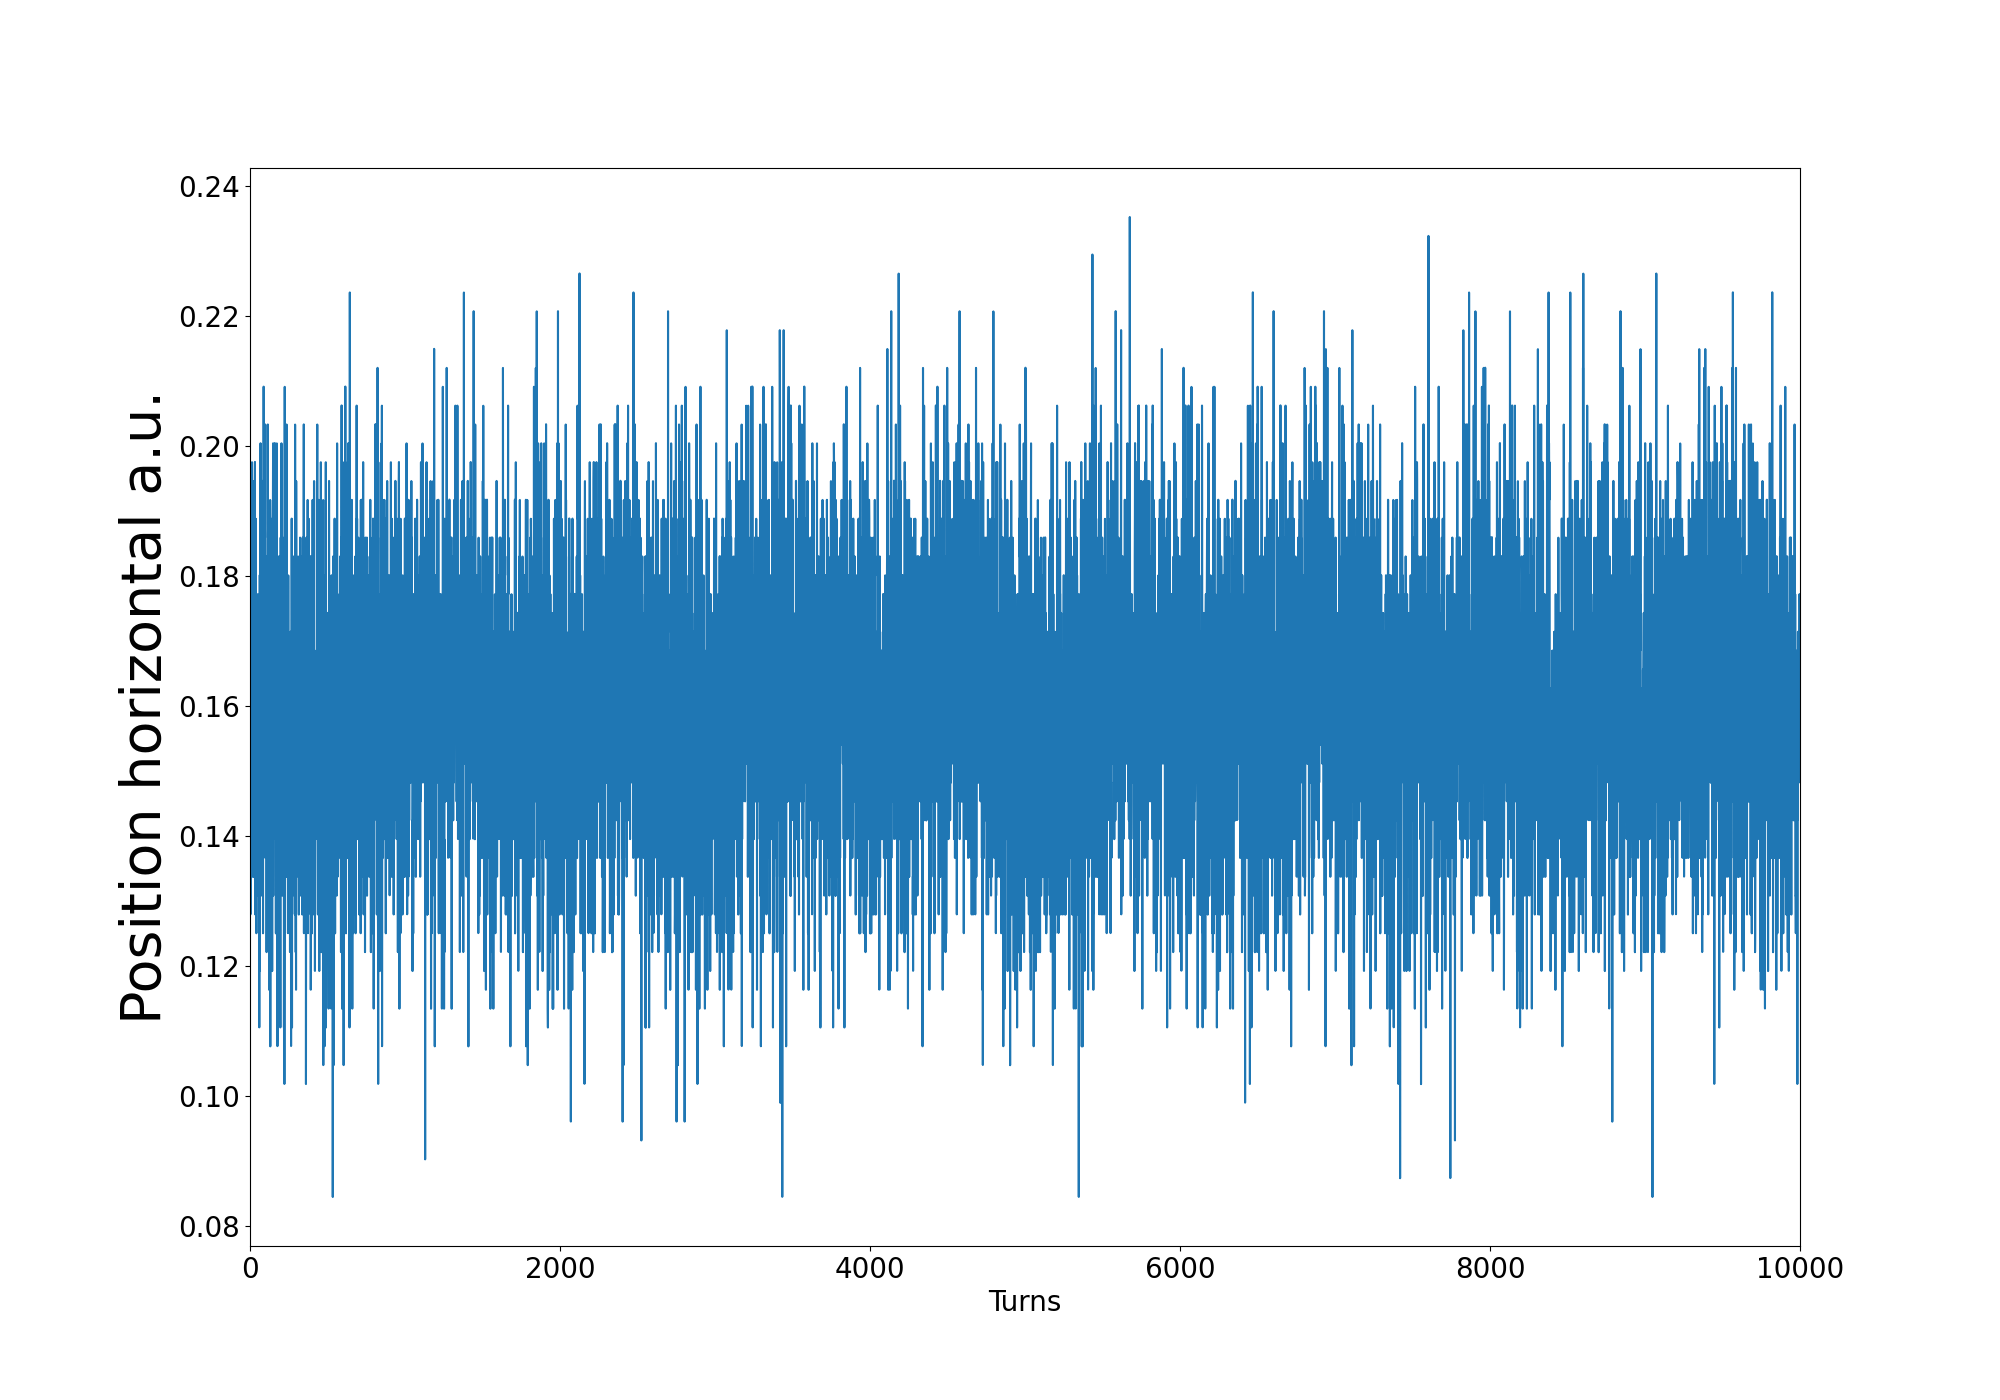

In [14]:
data1 = data.values

#print(data1['horPositionsConcentratedAndSorted'][::10000])
bpm = data1['horPositionsConcentratedAndSorted'][::10000] # data exploration and storage
#%matplotlib notebook
used = data1['horPositionsConcentratedAndSorted'][:10000]
dataa = []
step = np.arange(0,10000,1)

sampling_rate =11245.5
print(step)
for i in step:
    #print(i)
    data_new = np.mean(used[i:i+1])
    dataa.append(data_new)
plt.plot(np.arange(len(bpm)), bpm)
#plt.yscale('log')
plt.show()
        
plt.figure(figsize=(20,14))
plt.plot(step,dataa)
#plt.plot(frequencies,abs(fft) )
plt.xlim(0,10000)
#plt.xlim(0,30)
plt.xlabel('Turns', size = 20)
plt.ylabel('Position horizontal a.u.', size  =40)
# Adjust the tick size
plt.tick_params(axis='both', which='both', labelsize=20)

#plt.ylim(0,160)
plt.show()


In [15]:
#fft = np.fft.fft(data1['horPositionsConcentratedAndSorted'][:10000])
fft = np.fft.fft(dataa-np.mean(dataa))
n = len(fft)

frequencies = np.fft.fftfreq(n, d=1.0/sampling_rate)

<IPython.core.display.Javascript object>


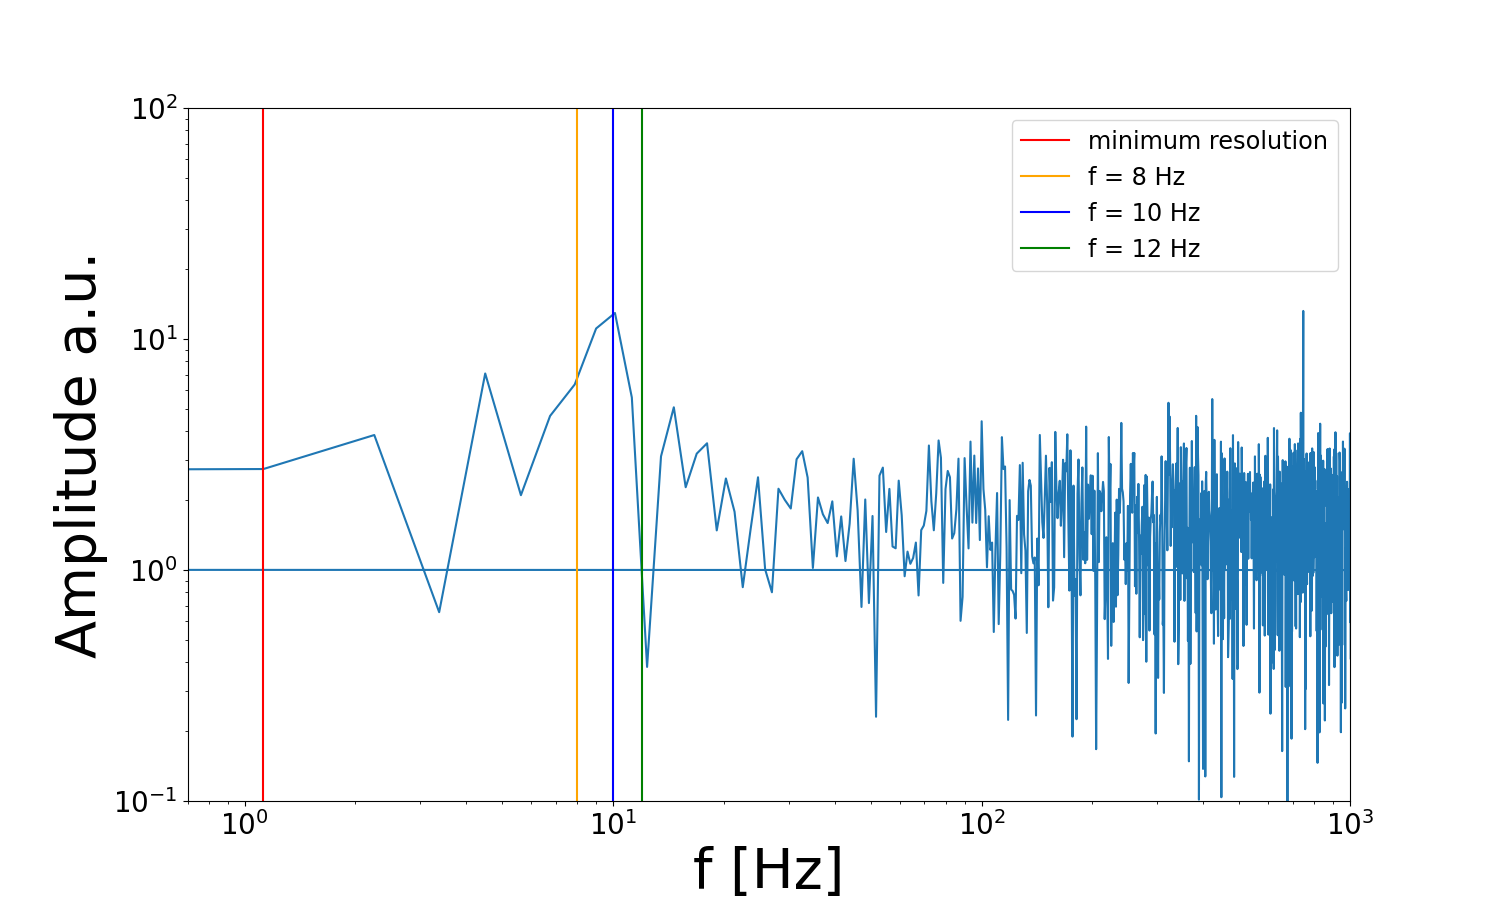

In [16]:
%matplotlib notebook
plt.figure(figsize=(15,9))
#plt.plot(np.arange(10000),(data1['horPositionsConcentratedAndSorted'][:10000]) )
plt.plot(frequencies,abs(fft) )
#plt.xlim(0,sampling_rate/2)
#plt.xlim(0,30)
plt.xlabel('f [Hz]', size = 40)
plt.ylabel('Amplitude a.u.', size  =40)
# Adjust the tick size
plt.tick_params(axis='both', which='both', labelsize=20)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-1, 1e2)
plt.xlim(7*1e-1,1e3)

colors = ['red', 'green', 'blue', 'orange']
plt.axvline(sampling_rate/10000, color='r', label= 'minimum resolution')
plt.axvline(8, color='orange', label = 'f = 8 Hz')
plt.axvline(10, color='b', label = 'f = 10 Hz')
plt.axvline(12, color='g', label= 'f = 12 Hz')

plt.legend(fontsize = 'xx-large')


#plt.ylim(0,20)